In [6]:
from pyspark.sql import SparkSession

# Initialize SparkSession
spark = SparkSession.builder \
    .appName("CampaignContactAnalysis") \
    .getOrCreate()

# Load the dataset into a DataFrame
historical_data = spark.read.csv("C:\\Users\\s559494\\OneDrive - nwmissouri.edu\\Documents\\NWMSU\\Subjects\\Spring 24\\Big Data\\Assignments\\bank-additional-full.csv", header=True, inferSchema=True)

# Register the DataFrame as a temporary view
historical_data.createOrReplaceTempView("campaign_data")

# Execute the SQL query to analyze contact patterns
result = spark.sql('''
    SELECT
        day_of_week,
        contact,
        month,
        AVG(duration) AS avg_duration,
        COUNT(*) AS contact_count
    FROM
        campaign_data
    GROUP BY
        day_of_week,
        contact,
        month
    ORDER BY
        day_of_week,
        month
        limit 15
''')

# Show the result
result.show()

# Stop SparkSession
spark.stop()


ParseException: 
[PARSE_SYNTAX_ERROR] Syntax error at or near 'Campaign'.(line 7, pos 18)

== SQL ==

    SELECT
        year(campaign_date) AS year,
        month(campaign_date) AS month,
        marital,
        day_of_week,
        Status on Campaign,
------------------^^^
        COUNT(*) AS campaign_count
    FROM
        historical_data
    GROUP BY
        year(campaign_date),
        month(campaign_date),
        marital,
        day_of_week,
        Status on Campaign
    ORDER BY
        year, month, marital, day_of_week, Status on Campaign


Total Section:
+----------------------+------------------+
|Total Not Participated|Total Participated|
+----------------------+------------------+
|                 10795|             30393|
+----------------------+------------------+

Job Counts Section:
+-------------+----------------+------------+
|          job|Not Participated|Participated|
+-------------+----------------+------------+
|   management|             795|        2129|
|      retired|             435|        1285|
|      unknown|              68|         262|
|self-employed|             355|        1066|
|      student|             224|         651|
|  blue-collar|            2437|        6817|
| entrepreneur|             427|        1029|
|       admin.|            2738|        7684|
|   technician|            1722|        5021|
|     services|            1078|        2891|
|    housemaid|             276|         784|
|   unemployed|             240|         774|
+-------------+----------------+------------+



<Figure size 1000x600 with 0 Axes>

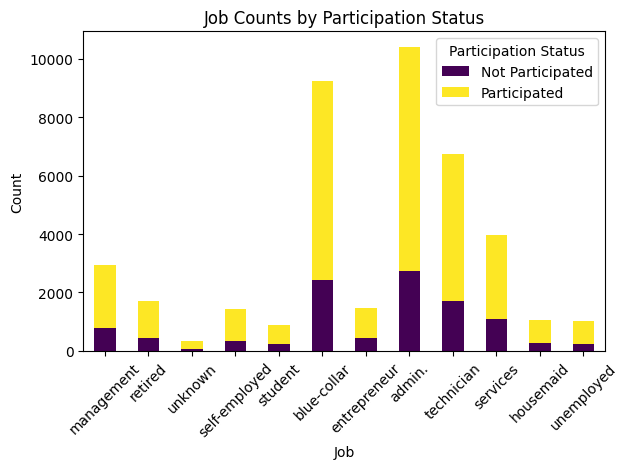

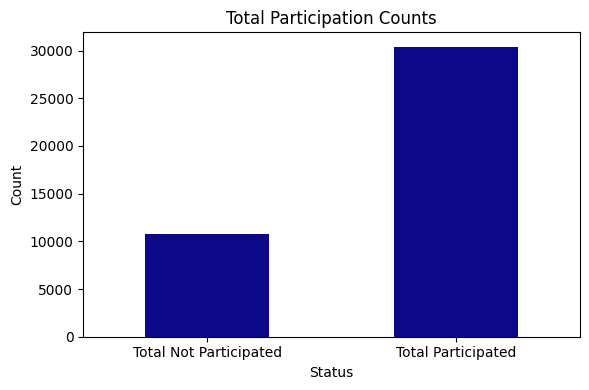

In [2]:
# Goal 2
from pyspark.sql import SparkSession
from pyspark.sql.functions import when, col, sum

# Create a SparkSession
spark = SparkSession.builder \
    .appName("Campaign Participation Analysis") \
    .getOrCreate()

# Load the dataset
df = spark.read.csv("C:\\Users\\s559494\\OneDrive - nwmissouri.edu\\Documents\\NWMSU\\Subjects\\Spring 24\\Big Data\\Assignments\\bank-additional-full.csv", 
                    header=True, inferSchema=True)

# Add a column for participation status
df = df.withColumn("participation_status", when(col("campaign") == 0, "Not Participated").otherwise("Participated"))

# Group by job and participation status, and count the occurrences
result = df.groupBy("job") \
    .pivot("participation_status") \
    .count() \
    .na.fill(0)  # Fill null values with 0

# Calculate total participation counts
total = result.groupBy().agg(
    sum("Not Participated").alias("Total Not Participated"),
    sum("Participated").alias("Total Participated")
)

# Print Total Section
print("Total Section:")
total.select("Total Not Participated", "Total Participated").show()

# Print Job Counts Section
print("Job Counts Section:")
result.show()

# Visualize the results
import matplotlib.pyplot as plt

# Extract data for visualization
job_counts = result.toPandas()
total_counts = total.toPandas().iloc[0]

# Plot Job Counts
plt.figure(figsize=(10, 6))
job_counts.plot(kind='bar', x='job', stacked=True, colormap='viridis')
plt.title('Job Counts by Participation Status')
plt.xlabel('Job')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Participation Status')
plt.tight_layout()
plt.show()

# Plot Total Section
plt.figure(figsize=(6, 4))
total_counts.plot(kind='bar', colormap='plasma')
plt.title('Total Participation Counts')
plt.xlabel('Status')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

<Figure size 800x600 with 0 Axes>

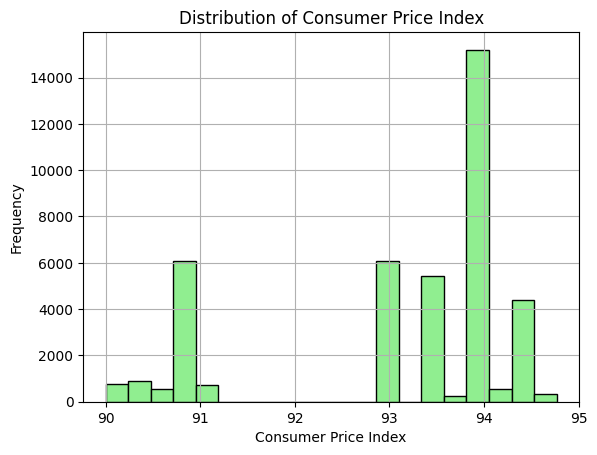

In [3]:
# Goal 5
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, rand, when
import matplotlib.pyplot as plt

# Create a SparkSession
spark = SparkSession.builder \
    .appName("Economic Conditions Analysis") \
    .getOrCreate()

# Load your DataFrame from a data source (e.g., CSV file)
df = spark.read.csv("C:\\Users\\s559494\\OneDrive - nwmissouri.edu\\Documents\\NWMSU\\Subjects\\Spring 24\\Big Data\\Assignments\\bank-additional-full.csv", header=True, inferSchema=True)

# Select relevant columns for analysis (economic indicators and customer response variables)
selected_columns = ["`cons.price.idx`", "`cons.conf.idx`", "`nr.employed`", "`campaign`", "`poutcome`", "`y`"]
df = df.select(selected_columns)

# Handle missing values and fill with random data
df = df.fillna(0)  # Fill missing values with 0
df = df.withColumn("`cons.price.idx`", when(col("`cons.price.idx`").isNull(), rand() * 100).otherwise(col("`cons.price.idx`")))
df = df.withColumn("`cons.conf.idx`", when(col("`cons.conf.idx`").isNull(), rand() * 100).otherwise(col("`cons.conf.idx`")))
df = df.withColumn("`nr.employed`", when(col("`nr.employed`").isNull(), rand() * 100000).otherwise(col("`nr.employed`")))
df = df.withColumn("`campaign`", when(col("`campaign`").isNull(), rand() * 50).otherwise(col("`campaign`")))

# Exploratory Data Analysis (EDA)
# Plot distribution of a single column
plt.figure(figsize=(8, 6))
df.select("`cons.price.idx`").toPandas().hist(bins=20, color='lightgreen', edgecolor='black')
plt.title('Distribution of Consumer Price Index')
plt.xlabel('Consumer Price Index')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Stop the SparkSession
spark.stop()

+----------------------+----------------------+--------------+-----------+
|campaign_participation|total_account_activity|total_deposits|total_loans|
+----------------------+----------------------+--------------+-----------+
|                    No|               2403831|          NULL|       1584|
|                   Yes|               6130351|          NULL|       4032|
+----------------------+----------------------+--------------+-----------+



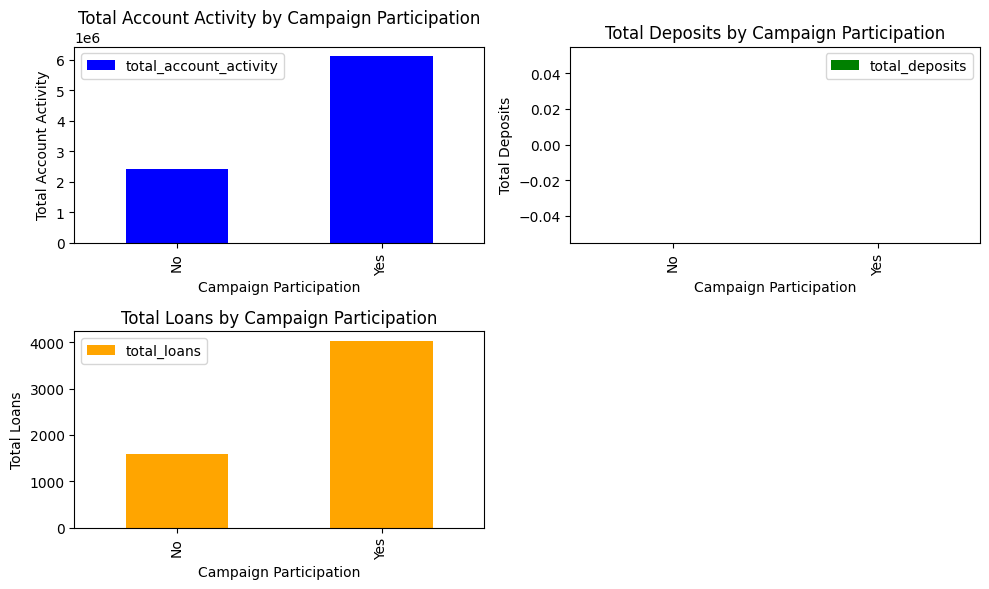

In [4]:
# Goal 6
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, when, sum as pyspark_sum
import matplotlib.pyplot as plt

# Create a SparkSession
spark = SparkSession.builder \
    .appName("Campaign Impact Analysis") \
    .getOrCreate()

# Load the dataset
df = spark.read.csv("C:\\Users\\s559494\\OneDrive - nwmissouri.edu\\Documents\\NWMSU\\Subjects\\Spring 24\\Big Data\\Assignments\\bank-additional-full.csv", header=True, inferSchema=True)

# Add a column to categorize customers based on campaign participation
df = df.withColumn("campaign_participation", when(col("campaign") == 0, "No").otherwise("Yes"))

# Group by campaign participation status and calculate the total account activity, deposits, and loans
campaign_impact = df.groupBy("campaign_participation") \
    .agg(
        pyspark_sum("duration").alias("total_account_activity"),
        pyspark_sum("loan").alias("total_deposits"),  # Corrected column name
        pyspark_sum("previous").alias("total_loans")
    )

# Show the results
campaign_impact.show()

# Plotting directly from Spark DataFrame using Pandas plot method
# Convert the DataFrame to Pandas DataFrame for plotting
campaign_impact_pd = campaign_impact.toPandas()

# Plotting
plt.figure(figsize=(10, 6))

# Plotting total account activity
plt.subplot(2, 2, 1)
campaign_impact_pd.plot(kind='bar', x='campaign_participation', y='total_account_activity', color='blue', ax=plt.gca())
plt.title('Total Account Activity by Campaign Participation')
plt.xlabel('Campaign Participation')
plt.ylabel('Total Account Activity')

# Plotting total deposits
plt.subplot(2, 2, 2)
campaign_impact_pd.plot(kind='bar', x='campaign_participation', y='total_deposits', color='green', ax=plt.gca())
plt.title('Total Deposits by Campaign Participation')
plt.xlabel('Campaign Participation')
plt.ylabel('Total Deposits')

# Plotting total loans
plt.subplot(2, 2, 3)
campaign_impact_pd.plot(kind='bar', x='campaign_participation', y='total_loans', color='orange', ax=plt.gca())
plt.title('Total Loans by Campaign Participation')
plt.xlabel('Campaign Participation')
plt.ylabel('Total Loans')

plt.tight_layout()
plt.show()

# Stop the SparkSession
spark.stop()

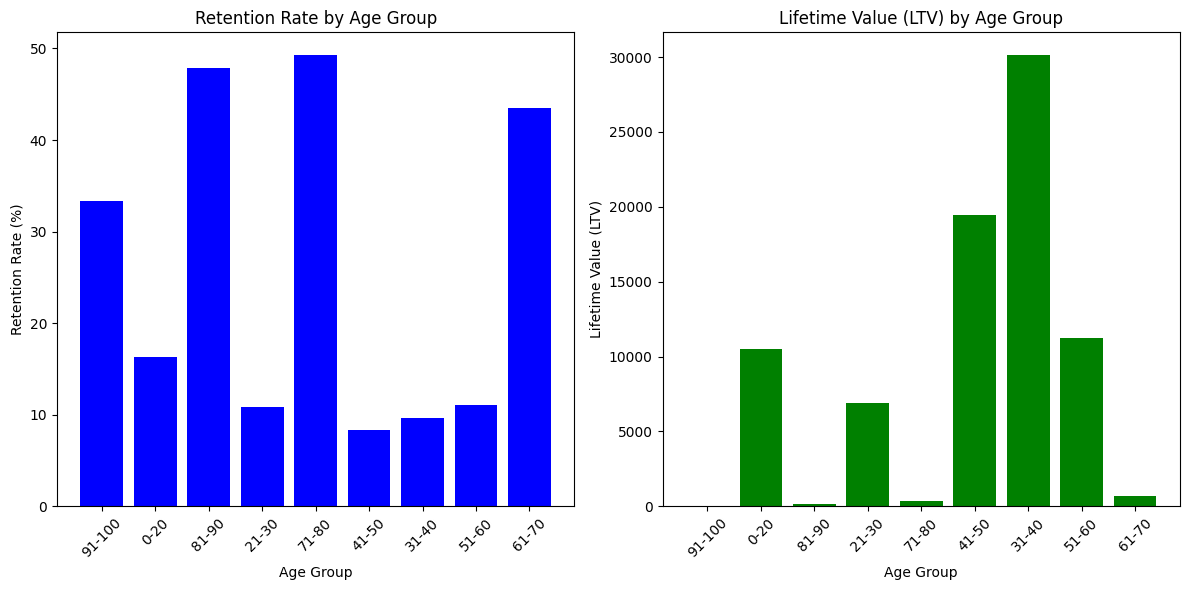

In [5]:
#7
import matplotlib.pyplot as plt
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, when, floor, sum as pyspark_sum

# Create a SparkSession
spark = SparkSession.builder \
    .appName("Customer Retention and Lifetime Value Analysis") \
    .getOrCreate()

# Load your DataFrame from a data source (e.g., CSV file)
df = spark.read.csv("C:\\Users\\s559494\\OneDrive - nwmissouri.edu\\Documents\\NWMSU\\Subjects\\Spring 24\\Big Data\\Assignments\\bank-additional-full.csv", header=True, inferSchema=True)

# Define age groups and labels
age_labels = ["0-20", "21-30", "31-40", "41-50", "51-60", "61-70", "71-80", "81-90", "91-100", "100+"]

# Categorize customers into age groups
df = df.withColumn("age_group", when(col("age").isNull(), "Unknown").otherwise(
    when(col("age") < 20, "0-20")
    .when(col("age") >= 100, "100+")
    .otherwise(
        when((col("age") >= 21) & (col("age") <= 30), "21-30")
        .when((col("age") >= 31) & (col("age") <= 40), "31-40")
        .when((col("age") >= 41) & (col("age") <= 50), "41-50")
        .when((col("age") >= 51) & (col("age") <= 60), "51-60")
        .when((col("age") >= 61) & (col("age") <= 70), "61-70")
        .when((col("age") >= 71) & (col("age") <= 80), "71-80")
        .when((col("age") >= 81) & (col("age") <= 90), "81-90")
        .when((col("age") >= 91) & (col("age") <= 100), "91-100")
        .otherwise("Unknown")
    )
))

# Calculate the total number of interactions for each age group
customer_interactions = df.groupBy("age_group").count()

# Calculate the number of returning customers (assuming a returning customer has more than one interaction)
returning_customers = df.groupBy("age_group", "y").count().filter(col("count") > 1)

# Calculate the total number of customers in each age group
total_customers = customer_interactions.groupBy("age_group").agg(pyspark_sum("count").alias("total_customers"))

# Calculate the retention rate for each age group
retention_rate_df = returning_customers.join(total_customers, "age_group") \
    .withColumn("retention_rate", (col("count") / col("total_customers")) * 100) \
    .select("age_group", "y", "retention_rate")

# Calculate the lifetime value (LTV) based on the total number of interactions for each age group
ltv_df = df.groupBy("age_group").agg(pyspark_sum("campaign").alias("total_interactions"))

# Plotting retention rate and LTV for each age group
retention_rates = retention_rate_df.filter(col("y") == "yes").select("age_group", "retention_rate").toPandas()
ltvs = ltv_df.toPandas()

plt.figure(figsize=(12, 6))

# Plot retention rate
plt.subplot(1, 2, 1)
plt.bar(retention_rates["age_group"], retention_rates["retention_rate"], color='blue')
plt.title('Retention Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Retention Rate (%)')
plt.xticks(rotation=45)

# Plot LTV
plt.subplot(1, 2, 2)
plt.bar(ltvs["age_group"], ltvs["total_interactions"], color='green')
plt.title('Lifetime Value (LTV) by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Lifetime Value (LTV)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Stop the SparkSession
spark.stop()